In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('vgsales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df=df.dropna()
df.reset_index(drop=True, inplace=True)

In [ ]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df['Name'].unique()
df['Platform'].unique()
df['Genre'].unique()
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'NA_Sales'}>],
       [<Axes: title={'center': 'EU_Sales'}>,
        <Axes: title={'center': 'JP_Sales'}>,
        <Axes: title={'center': 'Other_Sales'}>],
       [<Axes: title={'center': 'Global_Sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

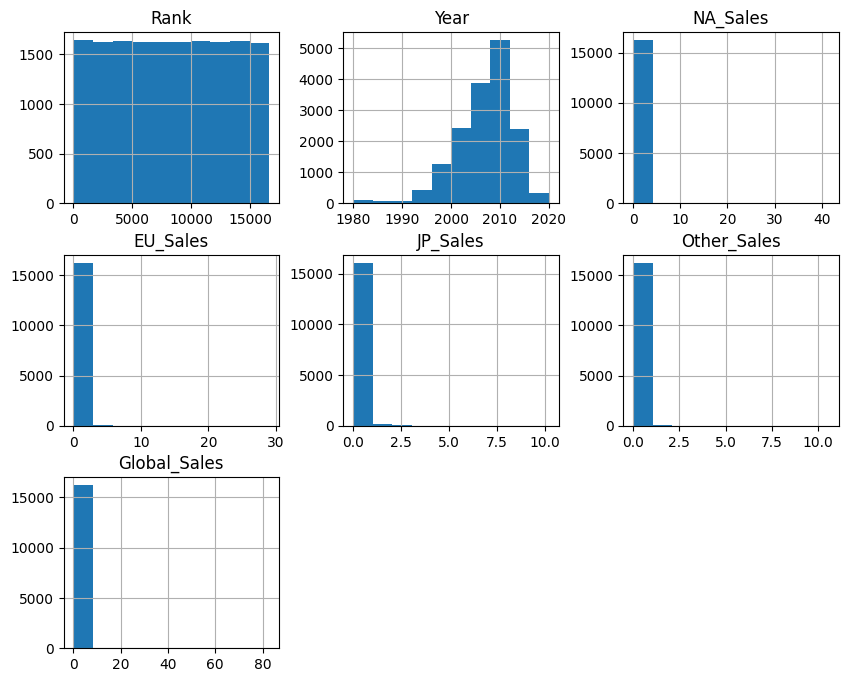

In [ ]:
df.hist(figsize=(10,8))

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
name_encoder=LabelEncoder()
df['Name']=name_encoder.fit_transform(df['Name'])

Platform_encoder=LabelEncoder()
df['Platform']=Platform_encoder.fit_transform(df['Platform'])

Genre_encoder=LabelEncoder()
df['Genre']=Genre_encoder.fit_transform(df['Genre'])

Publisher_encoder=LabelEncoder()
df['Publisher']=Publisher_encoder.fit_transform(df['Publisher'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  int64  
 2   Platform      16291 non-null  int64  
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  int64  
 5   Publisher     16291 non-null  int64  
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.4 MB


<Axes: >

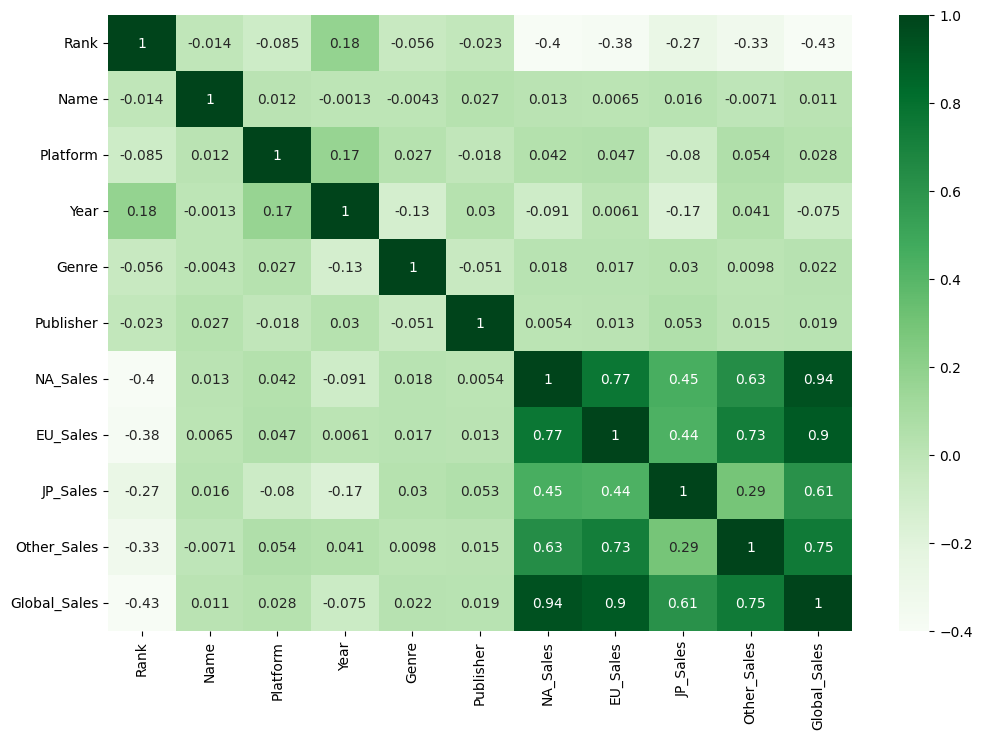

In [ ]:
x=df.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(x,annot=True,robust=True,cmap='Greens')

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1c6334cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1c63277a90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7d1c63276450>,
 'medians': [<matplotlib.lines.Line2D at 0x7d1c6327cdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d1c6327d710>,
 'means': []}

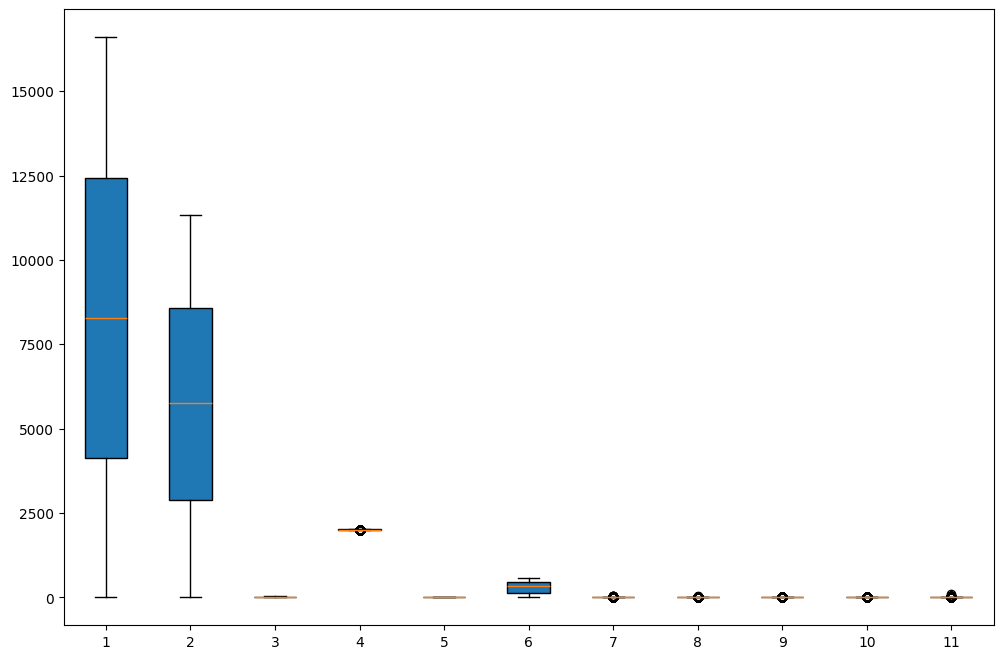

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(df,vert=True,patch_artist=True)

In [ ]:
# # REMOVING OUT LAYRES
# import numpy as np
# x=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
#        'EU_Sales', 'JP_Sales', 'Other_Sales']
# for i in x:
#     data=df[i]
#     q1=np.quantile(data,0.25)
#     q2=np.quantile(data,0.50)
#     q3=np.quantile(data,0.75)
#     iqr=q3-q1
#     lower=q1-(1.5*iqr)
#     upper=q3+(1.5*iqr)
#     outliers=[j for j in data if j<lower or j>upper]
#     print(len(outliers))
#     df1= df[(df[i] >= lower) & (df[i] <= upper)]

WE DONT NEED TO REMOVE OUTLIERS HERE,BECAUSE IF WE REMOVE THE OUTLIERS IT WILL CAUSE TO LOSS A HIGH AMOUNT OF REQUIRED DATA

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10849,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9201,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5493,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,10851,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7247,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,10942,6,2002.0,4,269,0.01,0.00,0.00,0.00,0.01
16287,16597,5713,7,2003.0,8,241,0.01,0.00,0.00,0.00,0.01
16288,16598,8039,16,2008.0,6,21,0.00,0.00,0.00,0.00,0.01
16289,16599,4938,4,2010.0,5,8,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  int64  
 2   Platform      16291 non-null  int64  
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  int64  
 5   Publisher     16291 non-null  int64  
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.4 MB


In [ ]:
x=df.drop(columns='Global_Sales')
y=df['Global_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
#+ target stored in y and features stored in x
# train-test split

In [ ]:
model=LinearRegression() # model define

In [ ]:
model.fit(x_train,y_train)
prediction=model.predict(x_test) # fit 7 prediction

In [ ]:
mae=mean_absolute_error(y_test,prediction)
mae
# seen error

0.003115738520149145

In [ ]:
mse=mean_squared_error(y_test,prediction)
mse
# seen error

2.8510041424624615e-05

In [ ]:
accuracy=r2_score(y_test,prediction)
accuracy
# seen accuracy

0.9999933356109517